In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import keras
from tqdm import tqdm
from keras.preprocessing import image
import matplotlib 
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
data = []
labels = []
classes = 43
cur_path = 'Train'

for i in tqdm(os.listdir(cur_path)):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:11<00:00,  3.67it/s]

(39209, 64, 64, 3) (39209,)


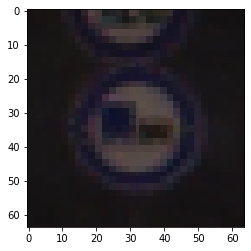

In [3]:
plt.imshow(data[3907])

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.25, random_state=21)

print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

# converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

((29406, 64, 64, 3), (29406,)) ((9803, 64, 64, 3), (9803,))


In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(64,64,3)))

model.add(Flatten())

model.add(Dense(units=43, activation = 'softmax'))

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #CCE: For Multiclass problems
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 43)                4953643   
Total params: 4,956,075
Trainable params: 4,956,075
Non-trainable params: 0
_________________________________________________________________


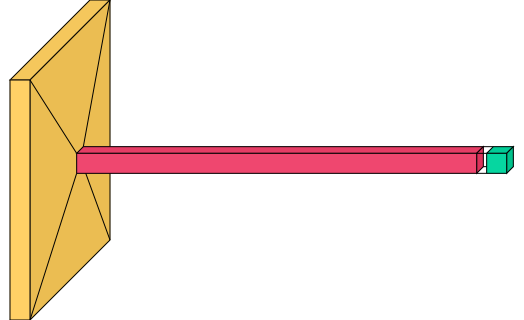

In [8]:
import visualkeras
visualkeras.layered_view(model)

In [9]:
epochs = 15
history = model.fit(x_train, y_train, 
                   batch_size=64,
                   epochs=epochs,
                   validation_data=(x_test, y_test))
    
    

Epoch 1/15
460/460 [==============================] - 40s 60ms/step - loss: 41.1673 - accuracy: 0.3953 - val_loss: 1.6623 - val_accuracy: 0.7525
Epoch 2/15
460/460 [==============================] - 27s 58ms/step - loss: 0.8073 - accuracy: 0.8185 - val_loss: 1.2689 - val_accuracy: 0.7509
Epoch 3/15
460/460 [==============================] - 27s 59ms/step - loss: 0.5360 - accuracy: 0.8794 - val_loss: 1.3046 - val_accuracy: 0.7646
Epoch 4/15
460/460 [==============================] - 27s 59ms/step - loss: 0.4148 - accuracy: 0.9068 - val_loss: 1.5855 - val_accuracy: 0.7709
Epoch 5/15
460/460 [==============================] - 27s 59ms/step - loss: 0.3024 - accuracy: 0.9331 - val_loss: 1.6398 - val_accuracy: 0.7878
Epoch 6/15
460/460 [==============================] - 27s 59ms/step - loss: 0.3764 - accuracy: 0.9184 - val_loss: 1.8359 - val_accuracy: 0.8151
Epoch 7/15
460/460 [==============================] - 28s 60ms/step - loss: 0.3437 - accuracy: 0.9275 - val_loss: 1.8557 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


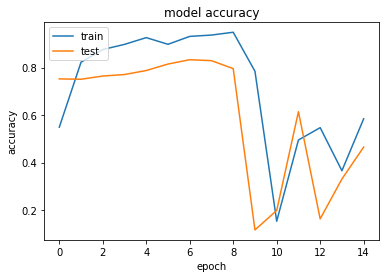

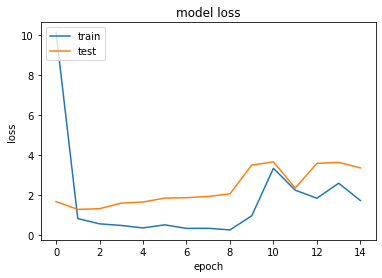

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.save('lenet_model')

INFO:tensorflow:Assets written to: lenet_model\assets


In [12]:
y_test = pd.read_csv('Test.csv')

In [23]:
test_labels = y_test['ClassId'].values
paths = y_test['Path'].values
test_dir = ''
data = []
for path in paths:
    full_path = os.path.join(test_dir, path)
    image = cv2.imread(full_path, -1)
    image = cv2.resize(image, (64,64), interpolation = cv2.INTER_NEAREST)
    data.append(np.array(image))
test_data = np.array(data)

In [27]:
from sklearn.metrics import accuracy_score
pred = model.predict_classes(test_data)
print("Test accuracy: {}".format(accuracy_score(test_labels, pred) * 100))

C:\Users\raxon\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test accuracy: 40.03958828186857
